In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

from dpmmlearn import DPMM
from dpmmlearn.probability import NormInvWish

sns.set()

## Prepare data

In [2]:
def prepare_data():
    X, y = make_blobs(n_samples=300, centers=7, n_features=2, cluster_std=0.6, random_state=0)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    return X, y

## Training

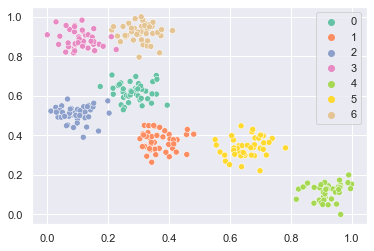

In [3]:
# prepare data
X, y = prepare_data()
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set2")
plt.show()

In [4]:
mu_0 = np.mean(X, axis=0)
kappa_0 = 1.0
Lam_0 = np.eye(2) * 10
nu_0 = 2
alpha = 3.0
prob = NormInvWish(mu_0, kappa_0, Lam_0, nu_0)
model = DPMM(prob, alpha, max_iter=300, random_state=0, verbose=True)

In [5]:
model.fit(X)

iter=init -- New label created: 0
iter=init -- New label created: 1
iter=init -- New label created: 2
iter=init -- New label created: 3
iter=1 -- New label created: 4
iter=1 -- New label created: 5
iter=1 -- New label created: 6
iter=1 -- New label created: 7
iter=2 -- New label created: 8
iter=2 -- New label created: 9
iter=2 -- New label created: 10
iter=2 -- Label deleted: 6
iter=2 -- Label deleted: 6
iter=3 -- Label deleted: 4
iter=3 -- Label deleted: 7
iter=4 -- New label created: 7
iter=4 -- New label created: 8
iter=4 -- Label deleted: 1
iter=4 -- Label deleted: 5
iter=5 -- New label created: 7
iter=5 -- New label created: 8
iter=6 -- New label created: 9
iter=6 -- Label deleted: 8
iter=7 -- Label deleted: 1
iter=12 -- Label deleted: 5
iter=108 -- New label created: 7
iter=109 -- Label deleted: 7
========== Finished! ==========
best_iter=202 -- n_labels: 7


DPMM(alpha=3.0, max_iter=300,
     prob=NormInvWish(mu_0=array([0.39238009, 0.53559083]), kappa_0=1.0, Lam_0=array([[10.,  0.],
       [ 0., 10.]]), nu_0=2))

## Result

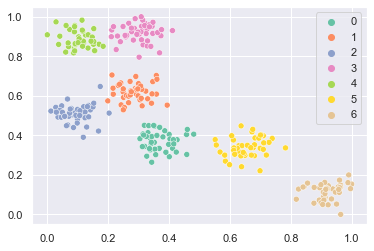

In [6]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=model.labels_, palette="Set2")
plt.show()